In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import t
import math

season_stats = pd.read_csv('Seasons_Stats.csv')

""" Structuring a DataFrame of aspects that imply a team plays a """

# team_playing_stats = season_stats.loc['Year', 'Tm', 'MP', 'PER', 'AST', 'AST%', 'USG%', 'PTS', '3PA', '2PA', 'PF']
""" build normalized series for each interesting column """
players_df = season_stats[['Tm', 'Year', 'AST', 'MP', 'PTS', '3PA', '2PA', 'PER', 'G']].dropna()
TOT_mask = players_df.Tm == 'TOT'           # the sum of stats for a player that played for more than 1 team
players_df = players_df[~TOT_mask]
players_df['TbY'] = players_df.Year.astype(int).apply(lambda name: str(name)) + ' ' + players_df.Tm
print(players_df)

        Tm    Year    AST      MP     PTS   3PA     2PA   PER     G       TbY
5727   LAL  1980.0  371.0  3143.0  2034.0   1.0  1382.0  25.3  82.0  1980 LAL
5728   GSW  1980.0   87.0  1222.0   362.0   1.0   317.0  11.0  67.0  1980 GSW
5729   PHO  1980.0  322.0  2168.0  1118.0   2.0   873.0  19.2  75.0  1980 PHO
5730   BOS  1980.0  671.0  2864.0  1131.0  18.0   776.0  15.3  80.0  1980 BOS
5731   CHI  1980.0   40.0   560.0    86.0   0.0    60.0   7.4  26.0  1980 CHI
...    ...     ...    ...     ...     ...   ...     ...   ...   ...       ...
24686  CHO  2017.0   99.0  1725.0   639.0   1.0   442.0  16.7  62.0  2017 CHO
24687  BOS  2017.0   42.0   525.0   178.0   1.0   157.0  13.0  51.0  2017 BOS
24688  ORL  2017.0    4.0   108.0    23.0   0.0    31.0   7.3  19.0  2017 ORL
24689  CHI  2017.0   36.0   843.0   240.0  99.0   122.0   6.9  44.0  2017 CHI
24690  LAL  2017.0   30.0   609.0   284.0   3.0   235.0  17.0  38.0  2017 LAL

[17286 rows x 10 columns]


In [3]:
"""
build team_playing_by_team DF with normalized series for each interesting column by team - X matrix:
    AST -   sum
    MP  -   distribution - nuschat motivation: 1 - normalized std
    PTS -   distribution
    PA  -   distribution
    PF  -   distribution
index - <season>_<team_name>
"""

""" maybe - check correlation between the columns in X """

""" build y series - team success for each season """

""" check correlation for each colum in X with y """

""" hypothesis testing """

""" try building a ML model to predict success - try to minimize error rate """


' try building a ML model to predict success - try to minimize error rate '

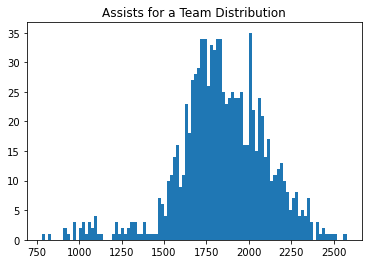

In [4]:
assists_by_team = players_df[['AST', 'TbY']].groupby(players_df.TbY).sum()
tby_mask = (players_df.groupby(players_df.TbY).count() > 13).Tm     # a team must have at least 14 players with data
plt.hist(assists_by_team[tby_mask], bins=100)
plt.title('Assists for a Team Distribution')
plt.show()


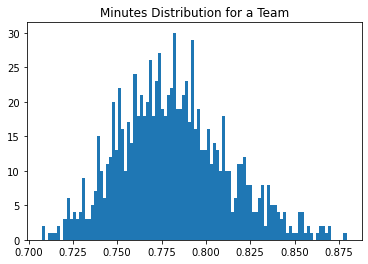

In [5]:
players_df['MpGnorm'] = players_df['MP'] / (players_df['G'] * 48)
norm_minutes_distribution = 1 - players_df[['MpGnorm', 'TbY']].groupby(players_df.TbY).std()
# The large the std => the division of minutes in the team is smaller.
plt.hist(norm_minutes_distribution[tby_mask], bins=100)
plt.title('Minutes Distribution for a Team')
plt.show()

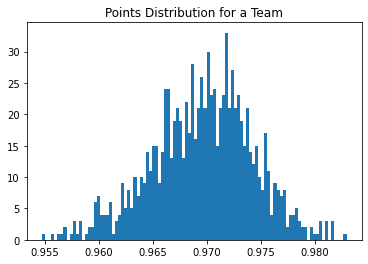

In [6]:
players_df['nPTS'] = players_df.PTS / players_df.G
points_distribution = players_df[['nPTS', 'TbY']].groupby(players_df.TbY).std()
norm_points_distribution = 1 - (points_distribution / np.linalg.norm(points_distribution))
# The large the std => the division of points in the team is smaller.
plt.hist(norm_points_distribution[tby_mask], bins=100)
plt.title('Points Distribution for a Team')
plt.show()

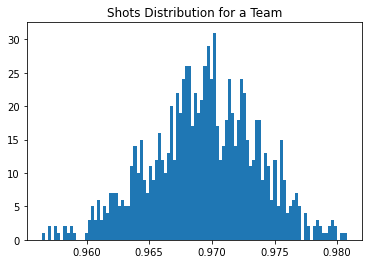

In [7]:
players_df['nPA'] = (3 * players_df['3PA'] + 2 * players_df['2PA']) / players_df.G
shots_distribution = players_df[['nPA', 'TbY']].groupby(players_df.TbY).std()
norm_shots_distribution = 1 - (shots_distribution / np.linalg.norm(shots_distribution))
# The large the std => the division of points in the team is smaller.
plt.hist(norm_shots_distribution[tby_mask], bins=100)
plt.title('Shots Distribution for a Team')
plt.show()

In [8]:
print(tby_mask)

TbY
1980 ATL     True
1980 BOS    False
1980 CHI     True
1980 CLE     True
1980 DEN     True
            ...  
2017 SAC     True
2017 SAS     True
2017 TOR     True
2017 UTA     True
2017 WAS     True
Name: Tm, Length: 1044, dtype: bool


                PER
TbY                
1984 CHI   2.254113
2002 WAS   2.456892
1992 NJN   2.570543
1993 SAC   2.573422
2001 WAS   2.580338
...             ...
2006 DEN  18.218071
1999 DEN  18.392851
2005 NYK  19.511366
1999 NJN  22.112726
2014 MIA  27.675574

[1044 rows x 1 columns]


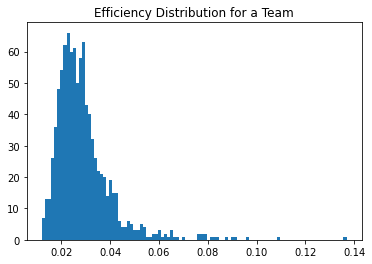

In [9]:
efficiency_distribution = players_df[['PER', 'TbY']].groupby(players_df.TbY).std()
norm_efficiency_distribution = efficiency_distribution / np.linalg.norm(efficiency_distribution)
# The large the std => the division of efficiency in the team is smaller.
# print(norm_minutes_distribution)
print(efficiency_distribution.sort_values(by='PER'))
plt.hist(norm_efficiency_distribution[tby_mask], bins=100)
plt.title('Efficiency Distribution for a Team')
plt.show()

In [33]:
relevant_teams_df = pd.DataFrame({ "nED" : norm_efficiency_distribution.PER,
                                   "nSD" : norm_shots_distribution.nPA,
                                   "nPD" : norm_points_distribution.nPTS,
                                   "nMD" : norm_minutes_distribution.MpGnorm,
                                   "AST" : assists_by_team.AST / np.linalg.norm(assists_by_team.AST) })
relevant_teams_df = relevant_teams_df[tby_mask]
print(relevant_teams_df)

               nED       nSD       nPD       nMD       AST
TbY                                                       
1980 ATL  0.027840  0.975730  0.971679  0.840058  0.031516
1980 CHI  0.018829  0.975989  0.972048  0.823408  0.035453
1980 CLE  0.026566  0.971467  0.968778  0.802178  0.034728
1980 DEN  0.021879  0.968642  0.965041  0.803798  0.034251
1980 DET  0.016981  0.972004  0.971225  0.818747  0.032125
...            ...       ...       ...       ...       ...
2017 SAC  0.021022  0.972533  0.971700  0.866913  0.030379
2017 SAS  0.026304  0.970016  0.969004  0.822827  0.032191
2017 TOR  0.022826  0.966100  0.965165  0.806817  0.024992
2017 UTA  0.024362  0.972074  0.971975  0.809557  0.027200
2017 WAS  0.025793  0.963857  0.964890  0.766324  0.032224

[958 rows x 5 columns]


In [34]:
team_records = pd.read_csv('Team_Records.csv')
team_records = team_records[team_records.Season > '1979']

def union_star(name):
    if name.endswith('*'):
        return name[:-1]
    return name

team_records['uNAME'] = team_records.Team.apply(lambda name: union_star(name))

team_names = pd.read_csv('Team_Names.csv')

def find_team(name):
    try:
        nn = team_names[team_names.Long == name].Short
        if nn.size == 1:
            return team_names[team_names.Long == name].Short.values[0]
        return 'NOT'
    except KeyError:
        return 'NOT'

team_records['NN'] = team_records.uNAME.apply(lambda name: find_team(name))
team_records['SS'] = team_records.Season.apply(
    lambda year: year[:2] + year[-2:] if year != '1999-00' else '2000')
team_records['TbY'] = team_records.SS + ' ' + team_records.NN

trt_mask = team_records.TbY.apply(lambda ts: True if ts in relevant_teams_df.index else False)
team_records = team_records[trt_mask]

trr_mask = pd.Series(relevant_teams_df.index, index=relevant_teams_df.index).apply(
    lambda ts: True if ts in team_records.TbY.values else False
)
relevant_teams_df = relevant_teams_df[trr_mask]

print(f'We now have a matrix of teamwork measures as X in shape {relevant_teams_df.shape},\n'
      f'and a matrix of team success measures as y in shape {team_records.shape}.')

# team_names = team_names.set_index(team_names.Short).drop(columns=['Short'])
# print(team_records.Team.unique())
# print(season_stats.Tm.unique())
# pd.Series(relevant_teams_df.index).apply(lambda team: print(team_names.loc(team[5:])))

We now have a matrix of teamwork measures as X in shape (936, 5),
and a matrix of team success measures as y in shape (936, 21).


['Lost E. Conf. Finals' 'Lost E. Conf. 1st Rnd.' nan 'Lost E. Conf. Semis'
 'Lost Finals' 'Won Finals' 'Lost W. Conf. Finals'
 'Lost W. Conf. 1st Rnd.' 'Lost W. Conf. Semis']


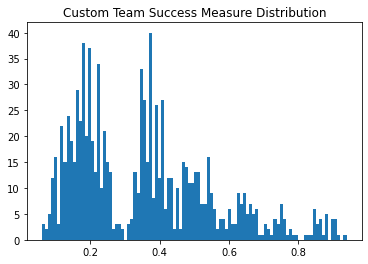

In [35]:
""" Structuring y column by giving weights to success measures """

print(team_records.Playoffs.unique())

playoffs_weights_dic = {np.nan : 0, 'Won Finals' : 1, 'Lost Finals' : 0.8,
                        'Lost W. Conf. Finals' : 0.6, 'Lost E. Conf. Finals': 0.6,
                        'Lost W. Conf. Semis': 0.4, 'Lost E. Conf. Semis' : 0.4,
                        'Lost W. Conf. 1st Rnd.' : 0.2, 'Lost E. Conf. 1st Rnd.' : 0.2}

team_records['PW'] = team_records.Playoffs.apply(lambda score: playoffs_weights_dic[score])
success = 0.5 * team_records['W/L%'] + 0.5 * team_records.PW
success.index = team_records.TbY

plt.hist(success, bins=100)
plt.title('Custom Team Success Measure Distribution')
plt.show()


In [36]:
" Re-arrange X matrix to fit with y column "
relevant_teams_df = relevant_teams_df.loc[success.index]

Efficiency    0.190496
Shots        -0.231869
Points       -0.417607
Minutes      -0.345032
Assists       0.226713
dtype: float64


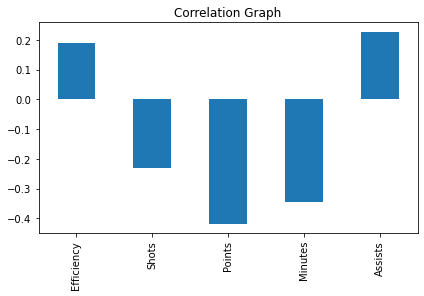

In [37]:
"""checking the correlation of the custom success with each parameter"""
correlation_series = pd.Series({"Efficiency" : stats.pearsonr(relevant_teams_df.nED, success)[0],
                                "Shots" : stats.pearsonr(relevant_teams_df.nSD, success)[0],
                                "Points" : stats.pearsonr(relevant_teams_df.nPD, success)[0],
                                "Minutes" : stats.pearsonr(relevant_teams_df.nMD, success)[0],
                                "Assists" : stats.pearsonr(relevant_teams_df.AST, success)[0]})
print(correlation_series)
correlation_series.plot(kind='bar')
plt.tight_layout()
plt.title('Correlation Graph')
plt.show() # success

Linear Regression with Success


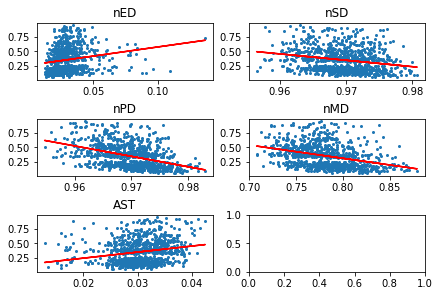

In [38]:
"""linear regression"""
fig, axs = plt.subplots(3, 2, constrained_layout=True)
# plot the 12 graphs
colIndex = 0
print("Linear Regression with Success")
for row in range(0, 3):
    for col in range(0, 2):
        if len(relevant_teams_df.columns) - 1 < colIndex:
            break
        x = relevant_teams_df[relevant_teams_df.columns[colIndex]]
        y = success
        m, b = np.polyfit(x, y, 1)
        axs[row, col].scatter(x, y, s=4)
        axs[row, col].plot(x, m * x + b, color="red")
        axs[row, col].set_title(relevant_teams_df.columns[colIndex])
        colIndex += 1


lower bound = 0.3400688385041357
upper bound = 0.37002945209415516
P_value with Efficiency is 0.1904964486305807 => Alternative hypothesis is rejected.
P_value with Shots is -0.23186887008756096 => Alternative hypothesis is rejected.
P_value with Points is -0.4176069347929759 => Alternative hypothesis is rejected.
P_value with Minutes is -0.34503210294400133 => Alternative hypothesis is accepted.
P_value with Assists is 0.2267127316898603 => Alternative hypothesis is rejected.


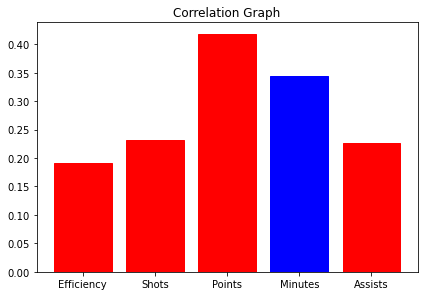

In [39]:
upper_bound = np.mean(success) - (np.std(success) / math.sqrt(len(success)) * t.ppf(0.01, len(success) - 1))
lower_bound = np.mean(success) + (np.std(success) / math.sqrt(len(success)) * t.ppf(0.01, len(success) - 1))
columns = ["Efficiency", "Shots", "Points", "Minutes", "Assists"]
print("lower bound =", lower_bound)
print("upper bound =", upper_bound)
barlist = plt.bar(columns, abs(correlation_series.values))
for i in range(len(correlation_series.values)):
    if upper_bound < np.abs(correlation_series.values[i]) or np.abs(correlation_series.values[i]) < lower_bound:
        barlist[i].set_color('red')
        print(f"P_value with {columns[i]} is {correlation_series.values[i]} => Alternative hypothesis is rejected.")
    else:
        barlist[i].set_color('blue')
        print(f"P_value with {columns[i]} is {correlation_series.values[i]} => Alternative hypothesis is accepted.")
plt.tight_layout()
plt.plot(upper_bound, color='b')
plt.plot(lower_bound, color='b')
plt.title('Correlation Graph')
plt.show()

In [40]:
print(relevant_teams_df.nED)

TbY
2017 BOS    0.030571
2016 BOS    0.026478
2015 BOS    0.028482
2014 BOS    0.021733
2013 BOS    0.054017
              ...   
2000 VAN    0.016926
1999 VAN    0.026450
1998 VAN    0.020968
1997 VAN    0.018458
1996 VAN    0.019530
Name: nED, Length: 936, dtype: float64


In [49]:
from statsmodels.formula.api import ols

# print(relevant_teams_df)
relevant_teams_df['success'] = success
# eff, shots, points, minutes, assists = relevant_teams_df.nED,
# print(eff.iloc[0])
linear_model = ols('success ~ nED+nSD+nPD+nMD+AST', data=relevant_teams_df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                success   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     61.43
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           2.21e-55
Time:                        23:05:32   Log-Likelihood:                 327.58
No. Observations:                 936   AIC:                            -643.2
Df Residuals:                     930   BIC:                            -614.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8453      1.573      4.986      0.0

In [50]:
linear_model = ols('success ~ nSD+nPD+nMD+AST', data=relevant_teams_df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                success   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     76.00
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           8.66e-56
Time:                        23:11:58   Log-Likelihood:                 326.26
No. Observations:                 936   AIC:                            -642.5
Df Residuals:                     931   BIC:                            -618.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0780      1.568      5.151      0.0